<a href="https://colab.research.google.com/github/srinivasreddyoleti/projects/blob/main/Simple_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bulding a Simple Linear Regression Model on Python

#Import Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Import data and prepare


In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Hitters1.xlsx to Hitters1 (1).xlsx


In [ ]:
df=pd.read_excel("Hitters1.xlsx")

In [ ]:
df.head(20)

,Price,Demand
0,3.0,6791
1,3.6,5988
2,40.0,354
3,21.0,651
4,4.0,7111
5,30.0,406
6,29.0,577
7,18.0,655
8,9.0,2891
9,6.0,5589


#Mark the response(Dependent) varible(Y) and predictor(Independent) variable(x)

In [ ]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values
x,y

(array([ 3. ,  3.6, 40. , 21. ,  4. , 30. , 29. , 18. ,  9. ,  6. ,  5. ,
         8. , 15. , 32. , 20. , 10. , 17. ,  7. , 39. ,  4. , 35. , 39. ,
        44. , 40. , 25. ,  8. ,  5. ,  8. , 10. , 14. , 26. ]),
 array([6791, 5988,  354,  651, 7111,  406,  577,  655, 2891, 5589, 6707,
        4081, 2702,  370, 1251, 3140, 2469, 4909,  396, 7017,  484,  297,
         141,  193, 2801, 3731, 7444, 3910, 2678, 1833, 2946]))

#check wheather there is a linear pattern between x and y

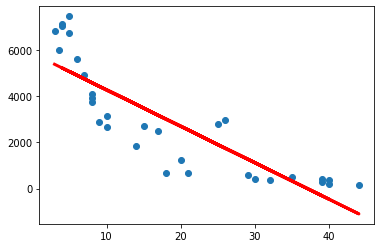

In [ ]:
plt.scatter(x,y)
z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),color='red',linewidth=3)

#Fitting a Simple Regression Model

#reshape your data using array.reshape(-1,1), if your data has one feature

In [ ]:
regressor=LinearRegression()
regressor.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression()

#Output

In [ ]:
regressor.coef_


array([[-157.70087387]])

In [ ]:
regressor.intercept_

array([5842.83619765])

#predicting the Y values from the obtained regression model

> Indented block



In [ ]:
y_pred=regressor.predict(x.reshape(-1,1))
y_pred

array([[ 5369.73357604],
       [ 5275.11305171],
       [ -465.19875726],
       [ 2531.11784633],
       [ 5212.03270216],
       [ 1111.80998147],
       [ 1269.51085534],
       [ 3004.22046794],
       [ 4423.5283328 ],
       [ 4896.63095442],
       [ 5054.33182829],
       [ 4581.22920667],
       [ 3477.32308956],
       [  796.40823373],
       [ 2688.8187202 ],
       [ 4265.82745893],
       [ 3161.92134182],
       [ 4738.93008054],
       [ -307.49788338],
       [ 5212.03270216],
       [  323.30561211],
       [ -307.49788338],
       [-1096.00225275],
       [ -465.19875726],
       [ 1900.31435084],
       [ 4581.22920667],
       [ 5054.33182829],
       [ 4581.22920667],
       [ 4265.82745893],
       [ 3635.02396344],
       [ 1742.61347696]])

# get the R-square value
R-square: explains the variability in the response(dependent) variable

In [ ]:
r2_score(y,y_pred)

0.7338976168337803

# Transformation of data to increase the R-sqare value

In [ ]:
y_new=np.sqrt(y)
y_new

array([82.40752393, 77.38216849, 18.81488772, 25.51470164, 84.32674546,
       20.14944168, 24.0208243 , 25.59296778, 53.76802024, 74.75961477,
       81.89627586, 63.88270501, 51.98076567, 19.23538406, 35.36947837,
       56.0357029 , 49.689033  , 70.06425622, 19.89974874, 83.76753548,
       22.        , 17.23368794, 11.87434209, 13.89244399, 52.92447449,
       61.08191222, 86.27861844, 62.5299928 , 51.74939613, 42.81354926,
       54.27706698])

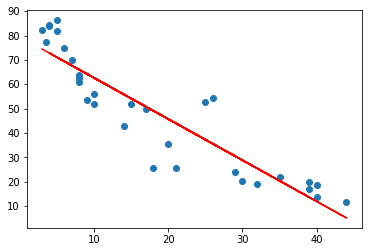

In [ ]:
plt.scatter(x,y_new)
z=np.polyfit(x,y_new,1)
p=np.poly1d(z)
plt.plot(x,p(x),color='red')

#Output

In [ ]:
regressor.fit(x.reshape(-1,1),y_new)
print(regressor.coef_)
print(regressor.intercept_)

[-1.68932556]
79.54515270075692


In [ ]:
ynew_pred=regressor.predict(x.reshape(-1,1))
ynew_pred

array([74.47717601, 73.46358068, 11.97213021, 44.06931589, 72.78785045,
       28.86538583, 30.5547114 , 49.13729258, 64.34122264, 69.40919933,
       71.09852489, 66.0305482 , 54.20526927, 25.48673471, 45.75864146,
       62.65189708, 50.82661814, 67.71987377, 13.66145577, 72.78785045,
       20.41875802, 13.66145577,  5.21482796, 11.97213021, 37.31201364,
       66.0305482 , 71.09852489, 66.0305482 , 62.65189708, 55.89459483,
       35.62268808])

In [ ]:
r2_score(ynew_pred,y_new)

0.7964286851715443

#Machine Learning Model

#Using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the dataset into train data and test data

*   Train data: Used to train the model
*   Test data: Used to test the obtained model



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x.reshape(-1,1),y.reshape(-1,1),test_size=0.2,random_state=0)

# fitting the regression model

In [ ]:
model_fit=LinearRegression()

In [ ]:
model_fit.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_fit.coef_

array([[-170.16858541]])

In [ ]:
model_fit.intercept_

array([6064.60053253])

In [ ]:
y_pred=model_fit.predict(x_test)
y_pred

array([[ -742.14288397],
       [ 3682.24033676],
       [  619.20579933],
       [ 5213.75760547],
       [ 4703.25184923],
       [ 4703.25184923],
       [-1422.81722563]])

# get the R-square value

In [ ]:
r2_score(y_test,y_pred)

0.6990175696186043